#***Analysis of Video Game Data From 1980 to 2017***
####*Spring 2024 Data Science Project*

Jeffrey Yan

***Member1: Jeffrey Yan,*** Contribution: 100%

I completed all of the work myself.

# Introduction

I spend so much time a week playing video games so I think that I should gain a better understanding of the medium as a whole. Thus I chose the Video Game Sales with Ratings Dataset, which contains both sales data across regions and user rating scores by metacritic staff and users. I'm interested in seeing if I can predict the critic score with the other variables in the data set. I'm curious as to see how the various variables can impact a critic's decision when they give their ratings.

Throughout this project we will be cleaning this dataset, performing a few statistical tests, and training a machine learning regression model to try to predict critic's ratings.

The dataset can be found here:

https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings









Imported libraries can be found below:

In [158]:
import pandas as pd # used for handling the data as a dataframe.
import scipy.stats as stats # used for statistical testing
import matplotlib.pyplot as plt # used for plotting/visualizing the data
from seaborn import heatmap # used for visualizing the correlation matrix

# I used numpy for its log function for log transformation
import numpy as np
# used to split the data into a training dataset and testing dataset
from sklearn.model_selection import train_test_split
# I used the Standard Scaler to scale to standerdize the data
from sklearn.preprocessing import StandardScaler

# used for construction a machine learning regression model
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Section 1 Data Exploration

In [160]:
df = pd.read_csv('/content/drive/MyDrive/Year 2 Semester 2/CMSC 320/Project/Video_Games_Sales_as_at_22_Dec_2016.csv')

The data includes the name of each game, the platform, year of release, genre, publisher, Globla Sales, North American Sales, European Sales, Japanese Sales, Other Sales, criitcs scores, critic count, user score, user count, developer, and rating. The dataset hasn't been updated in 7 years, and only contains video games from 1980 to 2017 (2017 is almost empty with only 3 entries). Nonetheless there are more than enough data entries with over 10,000 video games. The dataset was created by a webscraper, and some data might have fell through the cracks. Also the Metacritic website only covers a subset of platforms, so the Metacritic portion of the data may be somewhat incomplete.


In [161]:
# lets look at the data
df.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   
5  Nintendo     23.20      2.26      4.22         0.58         30.26   
6  Nintendo     11.28      9.14      6.50         2.88         29.80   
7  Nintendo     13.96      9.18      2.93         2.84         28.92   
8  Nintendo     14.44      6.94      4.70         2.24         28.32   
9  Nintendo     26.93      0.63      0.28         0.47         28.31   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          51.0          8       322.0  Nintendo      E  
1           NaN           NaN        NaN         NaN       NaN    NaN  
2          82.0          73.0        8.3       709.0  Nintendo      E  
3          80.0          73.0          8       192.0  Nintendo      E  
4           NaN           NaN        NaN         NaN       NaN    NaN  
5           NaN           NaN        NaN         NaN       NaN    NaN  
6          89.0          65.0        8.5       431.0  Nintendo      E  
7          58.0          41.0        6.6       129.0  Nintendo      E  
8          87.0          80.0        8.4       594.0  Nintendo      E  
9           NaN           NaN        NaN         NaN       NaN    NaN

In [162]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

##Section 1.0 User Scores
Also notice that User Scores is actually considered an object instead of a float, which is wierd as user score should be a float. This is because there is some nonnumeric data in that column that we need to remove/ coerce into Null.

In [164]:
# checks if the value in user_score is numeric. If it isn't then the value is coerced into NaN
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

## Section 1.1 Null Values
There are some null entries in the data so lets see how prevalent they are.

In [165]:
print("Amount of Rows Without Any Null Values: " + str(len(df.dropna())))
print("Amount of Rows With Some Null Values: " + str(len(df) - len(df.dropna())))

Amount of Rows Without Any Null Values: 6825
Amount of Rows With Some Null Values: 9894


There are a lot of null values, but the null values might only be concentrated in certain columns of data. Also how will we handle these null values?

In the outputs of the next few sections, True indicates that the value is null, while false measn that the value is true. The function is searching for any entires were the value is Null.

Name
False    16717
True         2
Name: count, dtype: int64

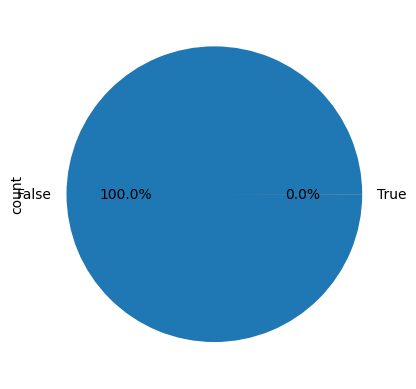

In [166]:
df['Name'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['Name'].isna().value_counts()

Platform
False    16719
Name: count, dtype: int64

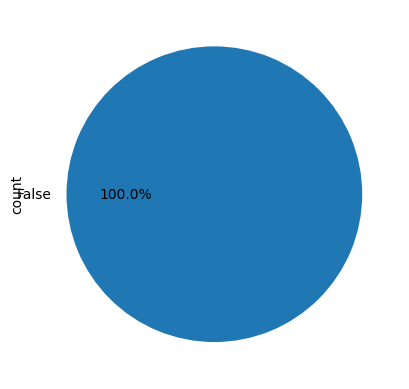

In [167]:
df['Platform'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['Platform'].isna().value_counts().sort_index()

Year_of_Release
False    16450
True       269
Name: count, dtype: int64

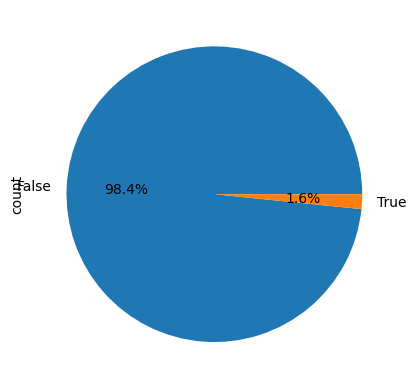

In [168]:
df['Year_of_Release'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['Year_of_Release'].isna().value_counts().sort_index()

Genre
False    16717
True         2
Name: count, dtype: int64

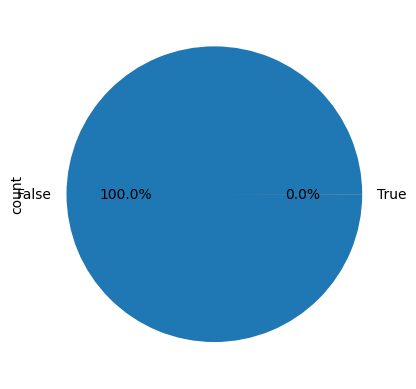

In [169]:
df['Genre'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['Genre'].isna().value_counts().sort_index()

Publisher
False    16665
True        54
Name: count, dtype: int64

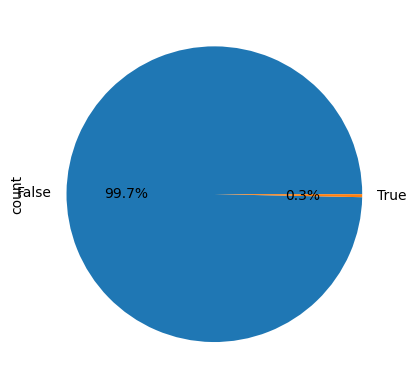

In [170]:
df['Publisher'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['Publisher'].isna().value_counts().sort_index()

NA_Sales
False    16719
Name: count, dtype: int64

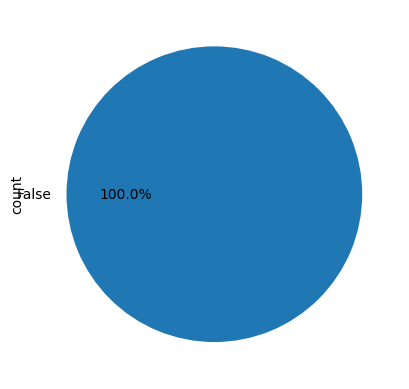

In [171]:
df['NA_Sales'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['NA_Sales'].isna().value_counts().sort_index()

EU_Sales
False    16719
Name: count, dtype: int64

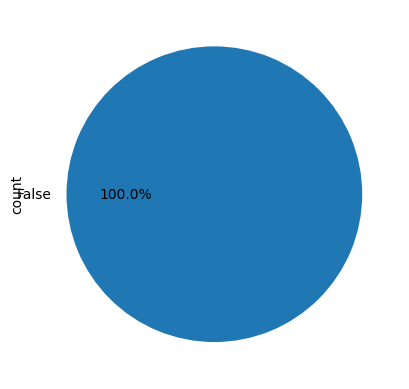

In [172]:
df['EU_Sales'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['EU_Sales'].isna().value_counts().sort_index()

JP_Sales
False    16719
Name: count, dtype: int64

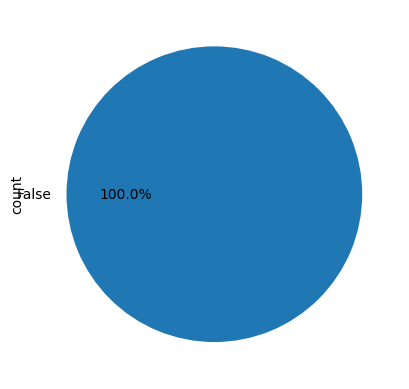

In [173]:
df['JP_Sales'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['JP_Sales'].isna().value_counts().sort_index()

Other_Sales
False    16719
Name: count, dtype: int64

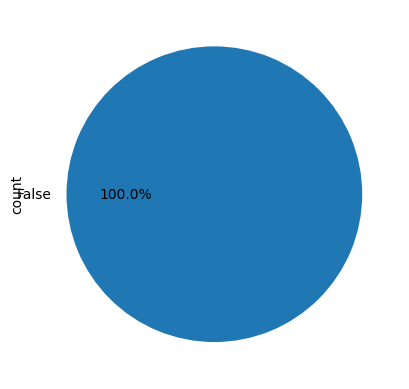

In [174]:
df['Other_Sales'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['Other_Sales'].isna().value_counts().sort_index()

Global_Sales
False    16719
Name: count, dtype: int64

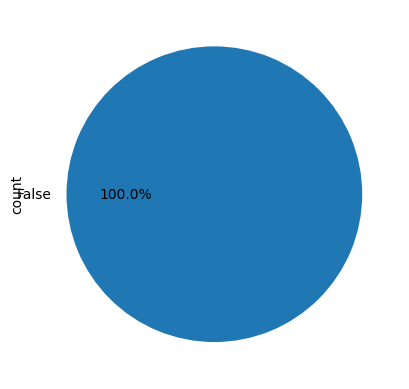

In [175]:
df['Global_Sales'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['Global_Sales'].isna().value_counts().sort_index()

Critic_Score
False    8137
True     8582
Name: count, dtype: int64

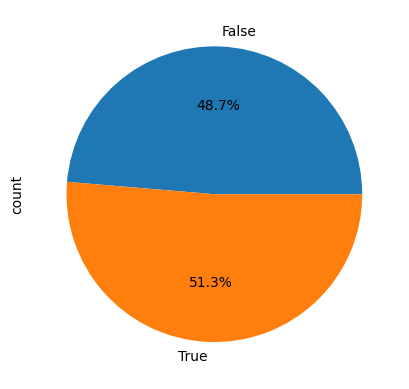

In [176]:
df['Critic_Score'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['Critic_Score'].isna().value_counts().sort_index()

Critic_Count
False    8137
True     8582
Name: count, dtype: int64

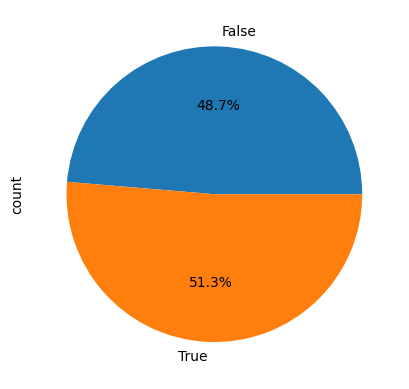

In [177]:
df['Critic_Count'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['Critic_Count'].isna().value_counts().sort_index()

User_Score
False    7590
True     9129
Name: count, dtype: int64

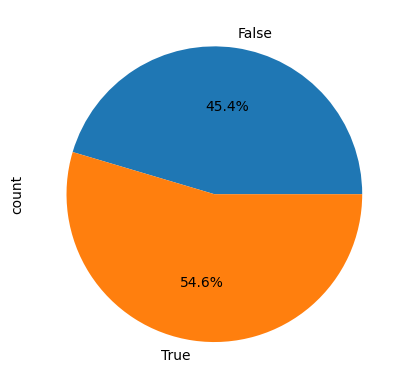

In [178]:
df['User_Score'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['User_Score'].isna().value_counts().sort_index()

User_Count
False    7590
True     9129
Name: count, dtype: int64

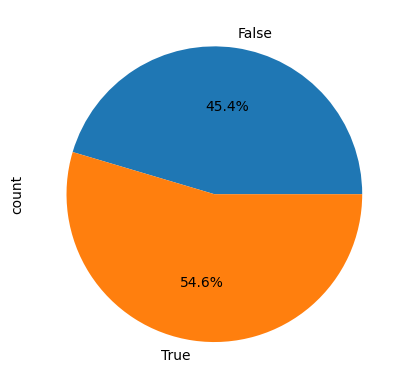

In [179]:
df['User_Count'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['User_Count'].isna().value_counts().sort_index()

Developer
False    10096
True      6623
Name: count, dtype: int64

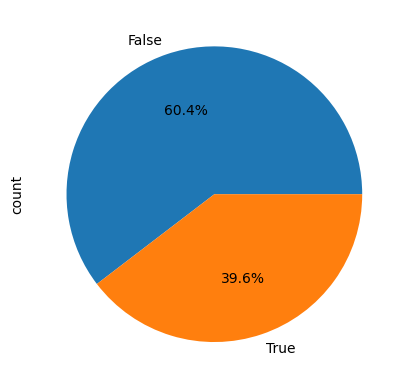

In [180]:
df['Developer'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['Developer'].isna().value_counts().sort_index()

Rating
False    9950
True     6769
Name: count, dtype: int64

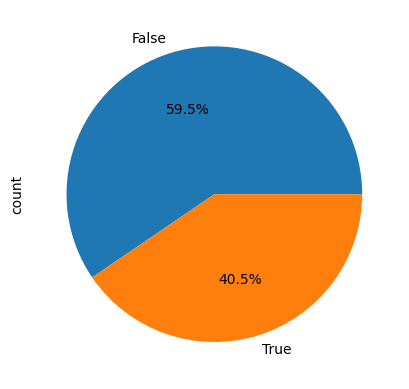

In [181]:
df['Rating'].isna().value_counts().sort_index().plot.pie(autopct='%1.1f%%')
df['Rating'].isna().value_counts().sort_index()

**Summary of Findings**

Columns: Platform, NA_Sales, EU_Sales, JP_Sales, Other_Sales, and Global_Sales had no null values so nothing needs to be done for them.

Columns: Name, Genre, and Publisher are all far below 1% proportion of null values. Dropping all null values from the three columns won't exceed 1% either. So the null values for these columns can be dropped without too much worry.

Columns: Year_of_Release has 1.6% null values. This is below 5% and the data is obviously numerical so we can use mean or median imputation. Meaning that we will filling all of the empty data with either the mean of the data, or the median of the data.

Columns: Critic_Score, Critic_Count, User_Score, User_Count, Developer, and Rating all have more than 30% null values. These values can't really be imputed as too many values are missing. We might still be able to draw conclusions from this portion of the data, but we won't be able to generalize the conclusions to all of video games. Instead we might be able to generalize conclusions from these columns to only games that were on the MetaCritic Website.

The criteria I used can be found and explained more in depth in the Data Cleaning Slides for CMSC320:
https://docs.google.com/presentation/d/1yj5p6gvYRWe2uYuTLfLPvm2QpPb9erakNDzAK89e7zE/edit#slide=id.g2848ac0f2f8_0_0  

## Section 1.2 Year_of_Release
Lets take a look at Year_of_Release. What would be the best form of data imputation for Year_of_Release?

In [182]:
df['Year_of_Release'].describe()

count    16450.000000
mean      2006.487356
std          5.878995
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year_of_Release, dtype: float64

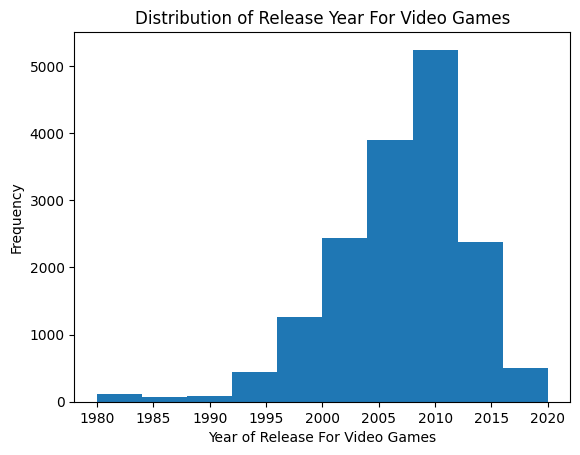

In [183]:
plt.hist(df['Year_of_Release'], bins=10)
plt.xlabel('Year of Release For Video Games')
plt.ylabel('Frequency')
plt.title('Distribution of Release Year For Video Games')
plt.show()

**Summary**

The data for Year_of_Release definitely appears skewed. Also the mean is significantly lower than the median, which implies that the data is skewed to the left. Therefore, the median of 2007 would be the better than the mean of 2006.487356 for imputation. Especially since mean can be adversely affected by skewed data. Furthermore, Its questionable to impute with a float when we are considering years what to do with years, which are discrete values.

More about data imputation can be found in the same slides as previously: https://docs.google.com/presentation/d/1yj5p6gvYRWe2uYuTLfLPvm2QpPb9erakNDzAK89e7zE/edit#slide=id.g2848ac0f2f8_0_0  

## Section 1.3 Handling Null Entries
Lets drop the null values for the categories were I can. And I will also impute Year_of_Release category with its median value. I will leave the columns with very high proportions of null values alone for now.

In [184]:
# dropping null from Name, Genre, Publisher
df_c = df.drop(df[df['Name'].isna()].index)
df_c = df_c.drop(df_c[df_c['Genre'].isna()].index)
df_c = df_c.drop(df_c[df_c['Publisher'].isna()].index)

# Imputing values for Year_of_Release
amount_to_be_imputed = len(df_c['Year_of_Release'][df_c['Year_of_Release'].isna()])
df_c['Year_of_Release'].fillna(df_c['Year_of_Release'].median(), inplace = True)

# printing results of imputation
print(df_c['Name'].isna().value_counts())
print(df_c['Genre'].isna().value_counts())
print(df_c['Publisher'].isna().value_counts())
print(df_c['Year_of_Release'].isna().value_counts())
print()
print("Number of Dropped Entries: " + str(len(df) - len(df_c)))
print("Percentage of Entries Dropped: " + str(100 * (len(df) - len(df_c)) / len(df)) + "%")
print("Number of Values Imputed: " + str(amount_to_be_imputed))
print("Percentage of Entries Imputed: " + str(100 * (amount_to_be_imputed) / len(df)) + "%")

# slightly less values to be imputed since some of them were dropped earlier.

Name
False    16663
Name: count, dtype: int64
Genre
False    16663
Name: count, dtype: int64
Publisher
False    16663
Name: count, dtype: int64
Year_of_Release
False    16663
Name: count, dtype: int64

Number of Dropped Entries: 56
Percentage of Entries Dropped: 0.3349482624558885%
Number of Values Imputed: 247
Percentage of Entries Imputed: 1.4773610861893653%


# Section 2 Statistical Methods
Now that we have finished cleaning the data (mroe or less) lets try analyzing/exploring the data. I will be using a few statistical tests and other methods. Any statistical tests done with the data will have a significance value of 0.05.

## Section 2.1 Correlation Between Regional and Global Sales
I plan to use Global Sales instead of any of the regional sales moving forward. However, it would be interesting to see the correlation between the various regional and global sales, and if certain regions have stronger or weaker correlations with the Global Sales. The .corr() method finds the pairwise Pearson Correlation Coefficient, which measures the strength of a linear correlation between two varaibles. Magnitude indicates the strength of the relationship, while positivty indicates whther the relation is a positive or negative linear correlation.

More about the Pearson Coefficient can be found here: https://www.scribbr.com/statistics/pearson-correlation-coefficient/

In [185]:
df_c.corr(numeric_only=True)

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.092206  0.003775 -0.168682     0.037535   
NA_Sales               -0.092206  1.000000  0.765293  0.449760     0.638622   
EU_Sales                0.003775  0.765293  1.000000  0.435171     0.722744   
JP_Sales               -0.168682  0.449760  0.435171  1.000000     0.291075   
Other_Sales             0.037535  0.638622  0.722744  0.291075     1.000000   
Global_Sales           -0.076374  0.941004  0.901221  0.612431     0.749196   
Critic_Score            0.011551  0.240759  0.220958  0.152593     0.198560   
Critic_Count            0.221818  0.295478  0.277634  0.180250     0.251692   
User_Score             -0.265329  0.086057  0.055432  0.125593     0.056980   
User_Count              0.174844  0.246443  0.283372  0.075638     0.238995   

                 Global_Sales  Critic_Score  Critic_Count  User_Score  \
Year_of_Release     -0.076374      0.011551      0.221818   -0.265329   
NA_Sales             0.941004      0.240759      0.295478    0.086057   
EU_Sales             0.901221      0.220958      0.277634    0.055432   
JP_Sales             0.612431      0.152593      0.180250    0.125593   
Other_Sales          0.749196      0.198560      0.251692    0.056980   
Global_Sales         1.000000      0.245544      0.303648    0.088082   
Critic_Score         0.245544      1.000000      0.425441    0.580571   
Critic_Count         0.303648      0.425441      1.000000    0.194164   
User_Score           0.088082      0.580571      0.194164    1.000000   
User_Count           0.265024      0.264543      0.362325    0.027154   

                 User_Count  
Year_of_Release    0.174844  
NA_Sales           0.246443  
EU_Sales           0.283372  
JP_Sales           0.075638  
Other_Sales        0.238995  
Global_Sales       0.265024  
Critic_Score       0.264543  
Critic_Count       0.362325  
User_Score         0.027154  
User_Count         1.000000

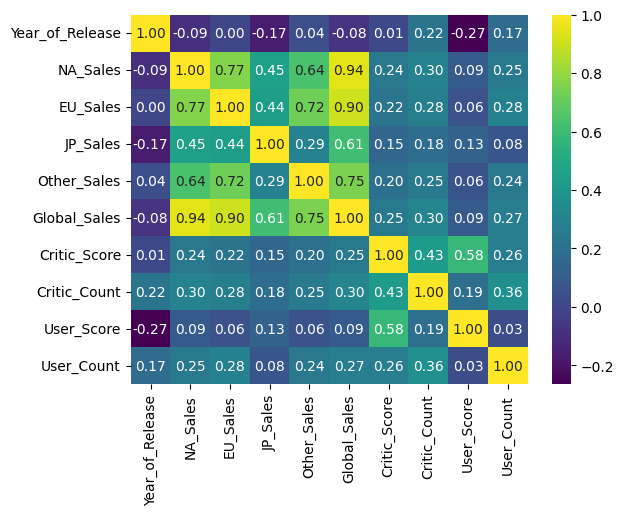

In [186]:
heatmap(df_c.corr(numeric_only=True), annot=True, cmap="viridis", fmt="0.2f");

Notice how the block of correlations between the various sales categories is relatvely highly correlated, especially when compared to other regions.

Pearson: Coefficients:
              Global_Sales  NA_Sales
Global_Sales       1.00000   0.94101
NA_Sales           0.94101   1.00000


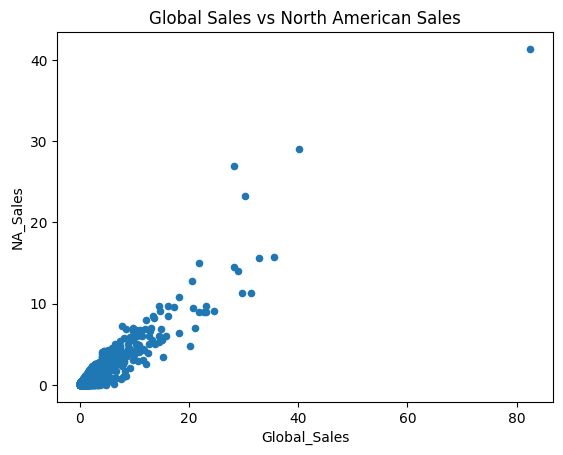

In [187]:
df_c.plot.scatter("Global_Sales", "NA_Sales", title="Global Sales vs North American Sales")
print("Pearson: Coefficients:")
print(df[["Global_Sales", "NA_Sales"]].corr())

Pearson: Coefficients:
              Global_Sales  EU_Sales
Global_Sales      1.000000  0.901239
EU_Sales          0.901239  1.000000


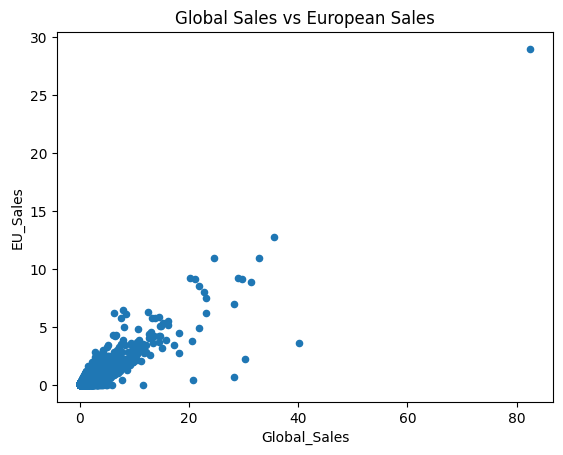

In [188]:
df_c.plot.scatter("Global_Sales", "EU_Sales", title="Global Sales vs European Sales")
print("Pearson: Coefficients:")
print(df[["Global_Sales", "EU_Sales"]].corr())

Pearson: Coefficients:
              Global_Sales  JP_Sales
Global_Sales        1.0000    0.6123
JP_Sales            0.6123    1.0000


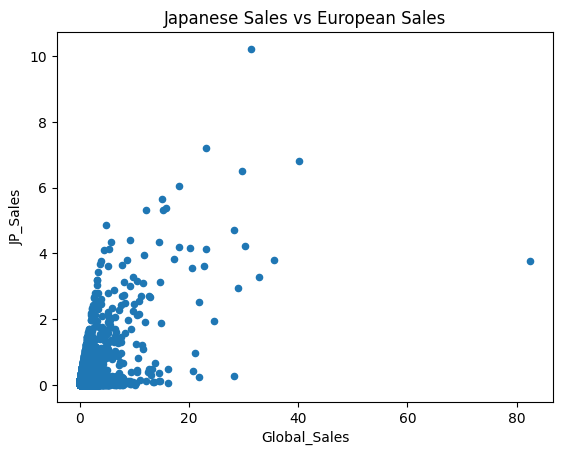

In [189]:
df_c.plot.scatter("Global_Sales", "JP_Sales", title="Japanese Sales vs European Sales")
print("Pearson: Coefficients:")
print(df[["Global_Sales", "JP_Sales"]].corr())

Pearson: Coefficients:
              Global_Sales  Other_Sales
Global_Sales      1.000000     0.749242
Other_Sales       0.749242     1.000000


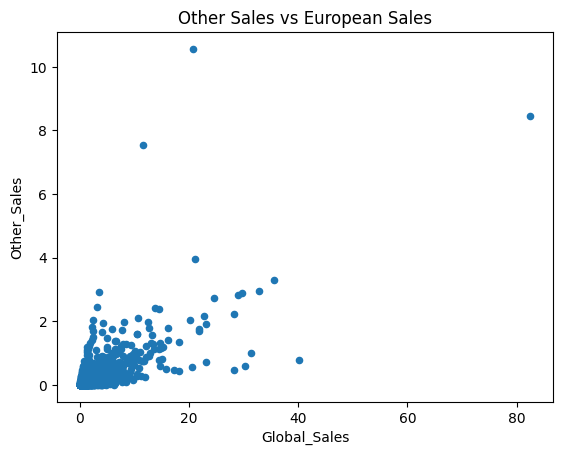

In [190]:
df_c.plot.scatter("Global_Sales", "Other_Sales", title="Other Sales vs European Sales")
print("Pearson: Coefficients:")
print(df[["Global_Sales", "Other_Sales"]].corr())

**Summary**

Overall, Global Sales has strong correlations with North American Sales and European Sales with the correlation coefficient being over 0.90. Global Sales also had high correlation with Other Sales as the Pearson Coefficient was nearly 0.75. However the Pearson Coefficient between Japan and Global Sales was the weakest with only around 0.6, which constitutes a moderate correlation.

## Section 2.2 Global Sales Average
My favorite game recently is called Armored Core 6 and its global sales was 2.8 million copies as of October 2023. I wonder if its sales were below or above the average global sales. Since I don't know the population standard deviation, I don't believe I can use the z-test. So instead I will use the One-Sample t-test.

(Note: the distribution for Global Sales is most likely not normal so a t-test probably isn't the best test to use in this scenario. A one sample Wilcoxon signed-rank would probably be ideal. However, I scipy only has the Wilcoxon test for two samples.)

Hypothesis:

H0: The average global sales of video games is greater than or equal to 2.8 million.

H1: The average global sales of video games is strictly less than 2.8 million.

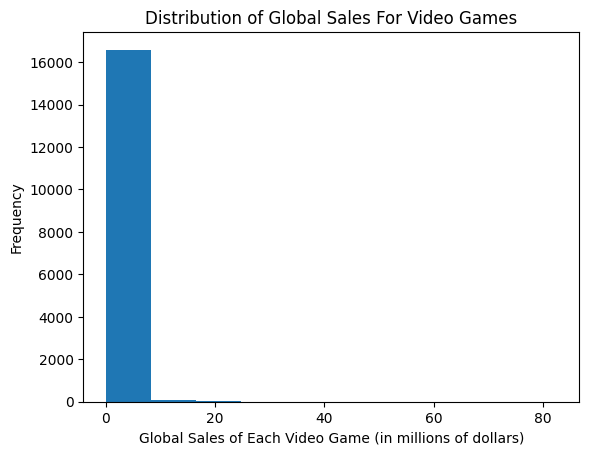

In [191]:
# Lets display some of the data (values are represented in millions)
plt.hist(df_c['Global_Sales'], bins=10)
plt.xlabel('Global Sales of Each Video Game (in millions of dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales For Video Games')
plt.show()

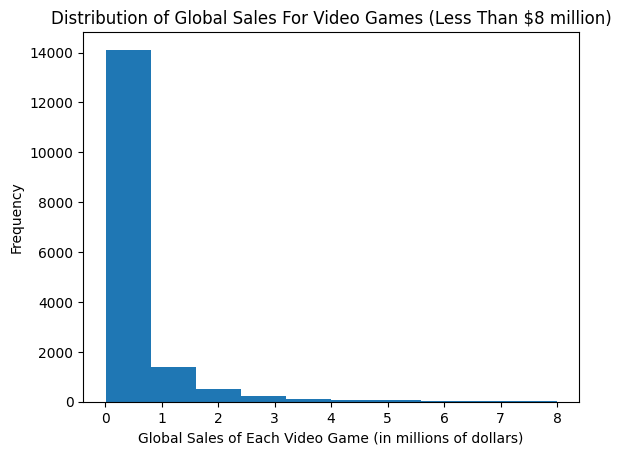

In [192]:
# That histogram wasn't really helpful so lets create a histogram to look at the smaller parts of the data.
plt.hist(df_c['Global_Sales'][df_c['Global_Sales'] < 8], bins=10)
plt.xlabel('Global Sales of Each Video Game (in millions of dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales For Video Games (Less Than $8 million)')
plt.show()

In [193]:
t_stat, pval = stats.ttest_1samp(df_c['Global_Sales'], 2.8, alternative='less')
print("T-test Statistic: " + str(t_stat))
print("P-value: " + str(pval))

T-test Statistic: -188.66989171674356
P-value: 0.0


The p-value is effectively 0, which is far below 0.05. Meaning that the probability that our Null Hypothesis (H0) is true is incredibally low. Thus we reject the null hypothesis. Meaning that the average global sales is less than 2.8 million. Therefore, Armored Core 6 sold above average.

More about the T-Test can be found here:
https://www.investopedia.com/terms/t/t-test.asp#:~:text=A%20t%2Dtest%20is%20an,flipping%20a%20coin%20100%20times.

## Section 2.3 Critic Scores and Global Sales
Lets check to see if differences in critic scores has any significant difference in Global Sales. After looking at the histograms for Global Sales, I believe its a fair assumption that Global Sales is not normally distributed. Therefore, I will use the Kruskal-Wallis Test instead of the ANOVA test.

H0: There is no significant difference in Global Sales between various ranges of Critics Scores (0-40, 40-60, 60-80, 80-100).

H1: There is at least 1 significant difference in Global Sales between any pair of the various ranges of Critics Scores (0-40, 40-60, 60-80, 80-100).

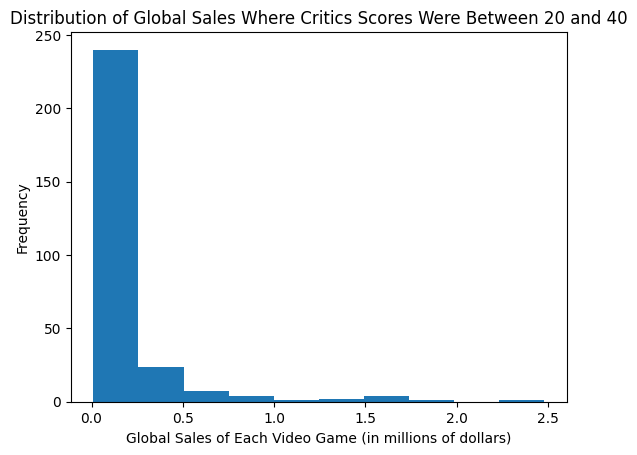

In [194]:
# Plotting the Global Sales as a histogram for each Critics Score Range
# Range 0-40
plt.hist(df_c['Global_Sales'][df_c['Critic_Score'] >= 0][df_c['Critic_Score'] < 40], bins=10)
plt.xlabel('Global Sales of Each Video Game (in millions of dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales Where Critics Scores Were Between 20 and 40')
plt.show()

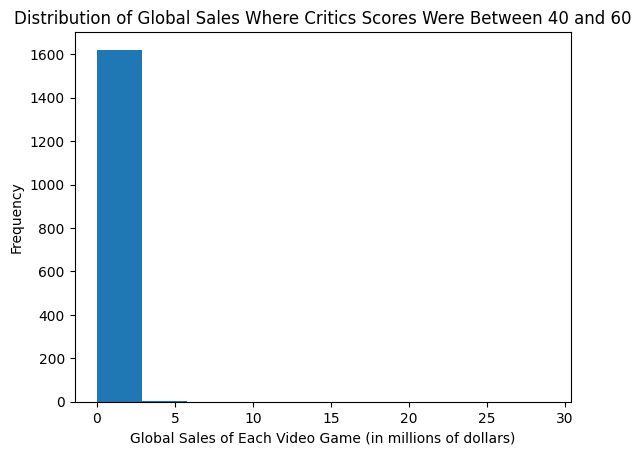

In [195]:
# Range 40-60
plt.hist(df_c['Global_Sales'][df_c['Critic_Score'] >= 40][df_c['Critic_Score'] < 60], bins=10)
plt.xlabel('Global Sales of Each Video Game (in millions of dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales Where Critics Scores Were Between 40 and 60')
plt.show()

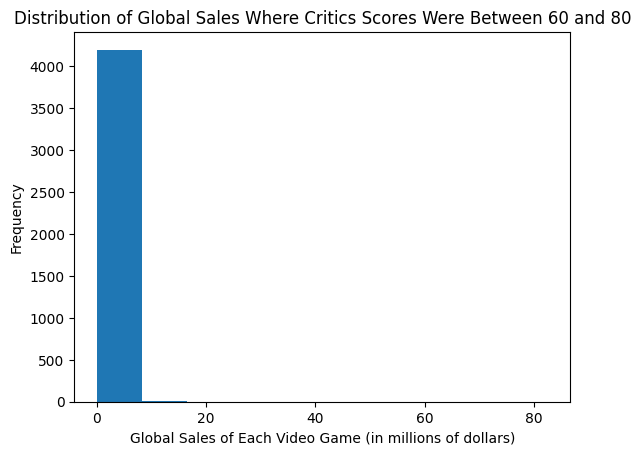

In [196]:
# Range 60-80
plt.hist(df_c['Global_Sales'][df_c['Critic_Score'] >= 60][df_c['Critic_Score'] < 80], bins=10)
plt.xlabel('Global Sales of Each Video Game (in millions of dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales Where Critics Scores Were Between 60 and 80')
plt.show()

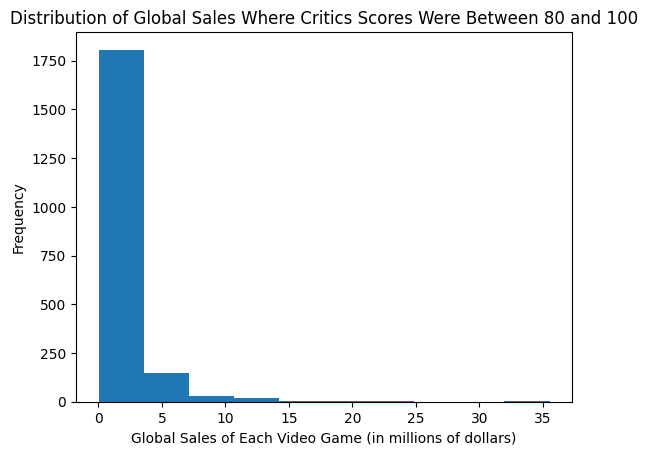

In [197]:
# Range 80-100
plt.hist(df_c['Global_Sales'][df_c['Critic_Score'] >= 80][df_c['Critic_Score'] <= 100], bins=10)
plt.xlabel('Global Sales of Each Video Game (in millions of dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales Where Critics Scores Were Between 80 and 100')
plt.show()

In [198]:
F_stat, pval = stats.kruskal(df_c['Global_Sales'][df_c['Critic_Score'] >= 0][df_c['Critic_Score'] < 40],
                              df_c['Global_Sales'][df_c['Critic_Score'] >= 40][df_c['Critic_Score'] < 60],
                              df_c['Global_Sales'][df_c['Critic_Score'] >= 60][df_c['Critic_Score'] < 80],
                              df_c['Global_Sales'][df_c['Critic_Score'] >= 80][df_c['Critic_Score'] <= 100])
print("ANOVA test Statistic: " + str(F_stat))
print("P-value: " + str(pval))

ANOVA test Statistic: 1131.7641611251904
P-value: 4.674511783457181e-245


The p value was basically 0, which is far below 0.05. The probability of the Null Hypothesis being true is incredibally unliekly. Therefore we must reject the null hypothesis, which means that there is a significant difference in the distributions of global sales for the various critics score ranges. Since we identified that there are some differences between each group, post hoc tests (in order to identify, which groups are different from each other). However, I won't be doing any here.

One can read more about Post Hoc Tests here: https://stats.libretexts.org/Bookshelves/Applied_Statistics/An_Introduction_to_Psychological_Statistics_(Foster_et_al.)/11%3A_Analysis_of_Variance/11.08%3A_Post_Hoc_Tests

And one can read more about Kruskal-Wallis Test here: https://library.virginia.edu/data/articles/getting-started-with-the-kruskal-wallis-test#:~:text=the%20same%20median-,Kruskal%2DWallis%20is%20a%20non%2Dparametric%20test%2C%20meaning%20it,k%2D1%20and%20chosen%20probability

(Note: there was a high rate of null data for Critic_Score Column so a large portion of data entries will be missing. Its not certain as to why the data is missing, so we don't know if the mising data is random or not. If it were lost due to some form of random error in web scraping then the data might be able to serve as a form of random sample. If it isn't random then we can't generalize the results.)

## Summary Of Our Data Exploration
After analyzing the proportion of null values for each column, I belive that it would be rather risky to use the critics or users data due to the high proportion of null entries in their columns. Or at the very least a significant caveat must accompany any conclusions drawn using that data.

Looking at the histogram representing the Global Sales, it appears that Global Sales is likely not normally distributed. Thus any future tests should be done with nonparametric tests like the Kruskal-Wallis Test.

Since global sales had the strongest correlation with the categories for sales. Meaning that global sales is the best feature to predict the other regional sales features, which is why I believe that it is a reasonably good feature to represent all the regional sales features. Thus I will continue using global sales instead of any of the regional sales when I need a feature to represent video game sales.

# Section 3 Machine Learning

Now with innitial data exploration complete lets try to answer our innitial question. I will be trying to train a regression model to predict critics scores based on all the other categories. Firstly lets drop all remaining null values as we still have more than enough data to train this model.


In [199]:
df_m = df_c.dropna()
df_m.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count  User_Score  User_Count Developer Rating  
0          51.0         8.0       322.0  Nintendo      E  
2          73.0         8.3       709.0  Nintendo      E  
3          73.0         8.0       192.0  Nintendo      E  
6          65.0         8.5       431.0  Nintendo      E  
7          41.0         6.6       129.0  Nintendo      E

##Section 3.1 Feature Engineering

The dependnet varaible will obviously be Critics Score.
Lets choose the variables that will be the independent variables.

I think all of the numeric data like year of release, sales data, etc should all be included, but how will we handle the non numerical data?

Non-numerical categorical data can be converted into numerical data through one-hot encoding, but one-hot encoding has some limitations as it can greatly increase the number of additional categories that get added to the data.


In [200]:
df_m['Name'].value_counts()

Name
Madden NFL 07                                9
LEGO Star Wars II: The Original Trilogy      8
Need for Speed: Most Wanted                  8
The Sims 2                                   7
Madden NFL 08                                7
                                            ..
Sherlock Holmes: The Mystery of the Mummy    1
No More Heroes 2: Desperate Struggle         1
Fishing Resort                               1
The House of The Dead III                    1
STORM: Frontline Nation                      1
Name: count, Length: 4417, dtype: int64

In [201]:
df_m['Platform'].value_counts()

Platform
PS2     1160
X360     877
PS3      782
PC       665
XB       580
Wii      491
DS       468
PSP      393
GC       356
GBA      241
PS4      239
XOne     159
3DS      157
PS       153
PSV      119
WiiU      89
DC        14
Name: count, dtype: int64

In [202]:
df_m['Genre'].value_counts()

Genre
Action          1663
Sports           965
Shooter          882
Role-Playing     718
Racing           591
Platform         406
Misc             394
Fighting         381
Simulation       301
Strategy         272
Adventure        249
Puzzle           121
Name: count, dtype: int64

In [203]:
df_m['Publisher'].value_counts()

Publisher
Electronic Arts                956
Ubisoft                        498
Activision                     498
Sony Computer Entertainment    316
THQ                            309
                              ... 
Activision Blizzard              1
DSI Games                        1
Sunsoft                          1
O3 Entertainment                 1
NewKidCo                         1
Name: count, Length: 263, dtype: int64

In [204]:
df_m['Developer'].value_counts()

Developer
EA Canada                   152
EA Sports                   145
Capcom                      128
Ubisoft                     104
Konami                       98
                           ... 
Ubisoft Annecy                1
Omega Force, Koei Canada      1
Sega, Tom Create              1
GCP1                          1
Atomic Games                  1
Name: count, Length: 1296, dtype: int64

In [205]:
df_m['Rating'].value_counts()

Rating
T       2418
E       2118
M       1459
E10+     944
RP         2
AO         1
K-A        1
Name: count, dtype: int64

Data like name, publisher, and developer all have too many unique values so the dataset would explode if we used one-hot encoding. Thus I'll leave them out.

The other categories like Platform and Genre are still quite big. But they are still large enough that I don't want to include both. I'll choose Genre since it feels like it will have more of an impact on deciding ciritcs scores and Genre has less categories.

The ratings category should be safe. However, since RP, AO, and K-A are so rare, I'll just drop them to simplify the data a bit.

In [206]:
# drop RP, AO, and K-A
df_m = df_m[df_m['Rating'] != 'RP'][df_m['Rating'] != 'AO'][df_m['Rating'] != 'K-A'];
# removing certain categories
df_m = df_m.loc[:, df_m.columns != 'Name']
df_m = df_m.loc[:, df_m.columns != 'Publisher']
df_m = df_m.loc[:, df_m.columns != 'Developer']
df_m = df_m.loc[:, df_m.columns != 'Platform']
df_m.head()

<ipython-input-206-d482528d8551>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_m = df_m[df_m['Rating'] != 'RP'][df_m['Rating'] != 'AO'][df_m['Rating'] != 'K-A'];
<ipython-input-206-d482528d8551>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_m = df_m[df_m['Rating'] != 'RP'][df_m['Rating'] != 'AO'][df_m['Rating'] != 'K-A'];


Year_of_Release     Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0           2006.0    Sports     41.36     28.96      3.77         8.45   
2           2008.0    Racing     15.68     12.76      3.79         3.29   
3           2009.0    Sports     15.61     10.93      3.28         2.95   
6           2006.0  Platform     11.28      9.14      6.50         2.88   
7           2006.0      Misc     13.96      9.18      2.93         2.84   

   Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count Rating  
0         82.53          76.0          51.0         8.0       322.0      E  
2         35.52          82.0          73.0         8.3       709.0      E  
3         32.77          80.0          73.0         8.0       192.0      E  
6         29.80          89.0          65.0         8.5       431.0      E  
7         28.92          58.0          41.0         6.6       129.0      E

Now lets apply one hot encoding on Genre and Category to convert the data into numerical data.  

In [207]:
df_enc = pd.get_dummies(df_m, columns=['Genre', 'Rating'])
df_enc

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0               2006.0     41.36     28.96      3.77         8.45   
2               2008.0     15.68     12.76      3.79         3.29   
3               2009.0     15.61     10.93      3.28         2.95   
6               2006.0     11.28      9.14      6.50         2.88   
7               2006.0     13.96      9.18      2.93         2.84   
...                ...       ...       ...       ...          ...   
16667           2001.0      0.01      0.00      0.00         0.00   
16677           2002.0      0.01      0.00      0.00         0.00   
16696           2014.0      0.00      0.01      0.00         0.00   
16700           2011.0      0.01      0.00      0.00         0.00   
16706           2011.0      0.00      0.01      0.00         0.00   

       Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  ...  \
0             82.53          76.0          51.0         8.0       322.0  ...   
2             35.52          82.0          73.0         8.3       709.0  ...   
3             32.77          80.0          73.0         8.0       192.0  ...   
6             29.80          89.0          65.0         8.5       431.0  ...   
7             28.92          58.0          41.0         6.6       129.0  ...   
...             ...           ...           ...         ...         ...  ...   
16667          0.01          46.0           4.0         2.4        21.0  ...   
16677          0.01          81.0          12.0         8.8         9.0  ...   
16696          0.01          80.0          20.0         7.6       412.0  ...   
16700          0.01          61.0          12.0         5.8        43.0  ...   
16706          0.01          60.0          12.0         7.2        13.0  ...   

       Genre_Racing  Genre_Role-Playing  Genre_Shooter  Genre_Simulation  \
0             False               False          False             False   
2              True               False          False             False   
3             False               False          False             False   
6             False               False          False             False   
7             False               False          False             False   
...             ...                 ...            ...               ...   
16667         False               False          False             False   
16677         False               False          False             False   
16696         False               False          False             False   
16700         False               False           True             False   
16706         False               False          False             False   

       Genre_Sports  Genre_Strategy  Rating_E  Rating_E10+  Rating_M  Rating_T  
0              True           False      True        False     False     False  
2             False           False      True        False     False     False  
3              True           False      True        False     False     False  
6             False           False      True        False     False     False  
7             False           False      True        False     False     False  
...             ...             ...       ...          ...       ...       ...  
16667         False           False      True        False     False     False  
16677         False           False     False        False      True     False  
16696         False           False     False        False      True     False  
16700         False           False     False        False     False      True  
16706         False            True     False         True     False     False  

[6939 rows x 26 columns]

Notice how data like global sales appears very skewed. Lets use log transform on the data. For instance look at how Global Sales gets transformed into a normal distribution.

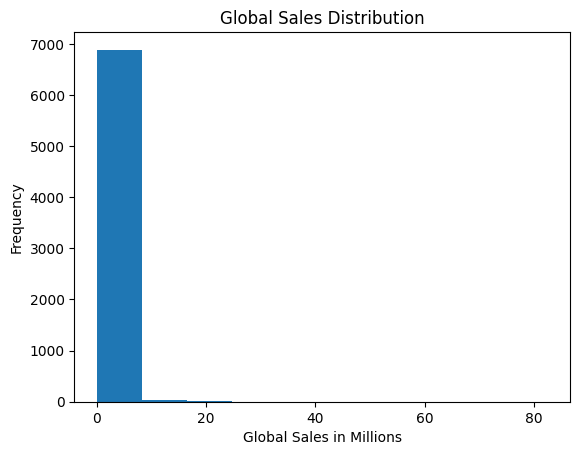

In [208]:
plt.hist(df_enc['Global_Sales'])
plt.xlabel('Global Sales in Millions')
plt.ylabel('Frequency')
plt.title('Global Sales Distribution')

plt.show()

In [209]:
df_enc['Global_Sales'] = np.log(df_enc['Global_Sales'])

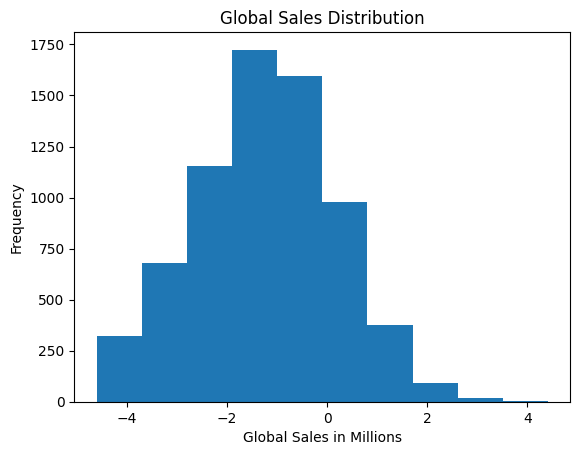

In [210]:
plt.hist(df_enc['Global_Sales'])
plt.xlabel('Global Sales in Millions')
plt.ylabel('Frequency')
plt.title('Global Sales Distribution')

plt.show()

I checked the sales data for the other regions, and the data was still incredibally skewed. However, the data included 0s making it difficult to apply log transforms. Since Global Sales was a decent representation of all the other sales categories, I will drop the other sales categories.

In [211]:
df_enc = df_enc.loc[:, df_enc.columns != 'NA_Sales']
df_enc = df_enc.loc[:, df_enc.columns != 'JP_Sales']
df_enc = df_enc.loc[:, df_enc.columns != 'EU_Sales']
df_enc = df_enc.loc[:, df_enc.columns != 'Other_Sales']

I checked the histograms of all of the other cateogires and it seems that Critic_Count and User_Counts are quite skewed. Thus I also applied log transform to Critic_Count and User_Counts.

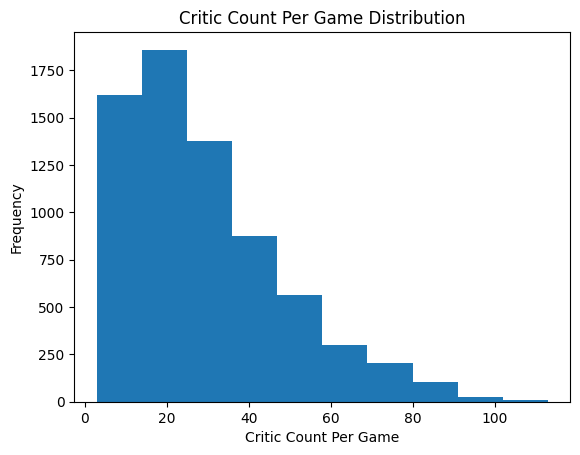

In [212]:
plt.hist(df_enc['Critic_Count'], bins=10)
plt.xlabel('Critic Count Per Game')
plt.ylabel('Frequency')
plt.title('Critic Count Per Game Distribution')
plt.show()

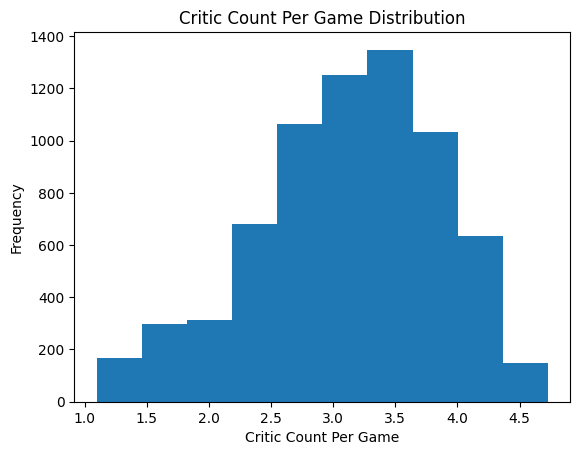

In [213]:
# apply log transform and regraph
df_enc['Critic_Count'] = np.log(df_enc['Critic_Count'])
plt.hist(df_enc['Critic_Count'], bins=10)
plt.xlabel('Critic Count Per Game')
plt.ylabel('Frequency')
plt.title('Critic Count Per Game Distribution')
plt.show()

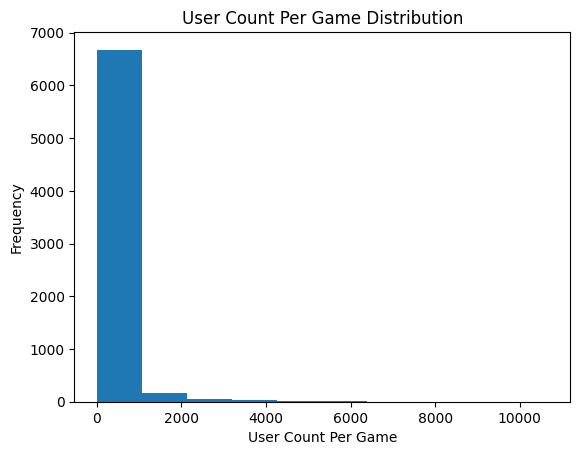

In [214]:
plt.hist(df_enc['User_Count'], bins=10)
plt.xlabel('User Count Per Game')
plt.ylabel('Frequency')
plt.title('User Count Per Game Distribution')
plt.show()

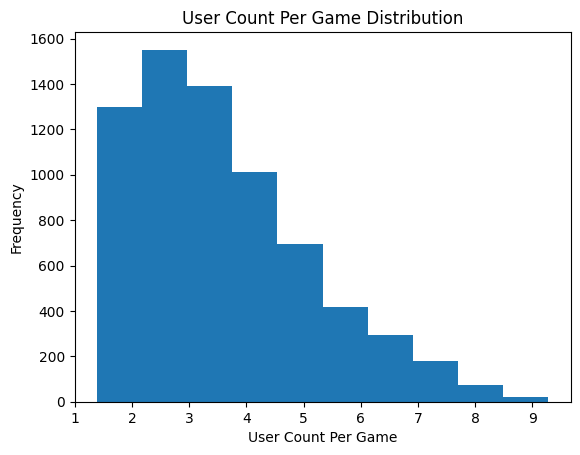

In [215]:
df_enc['User_Count'] = np.log(df_enc['User_Count'])
plt.hist(df_enc['User_Count'], bins=10)
plt.xlabel('User Count Per Game')
plt.ylabel('Frequency')
plt.title('User Count Per Game Distribution')
plt.show()

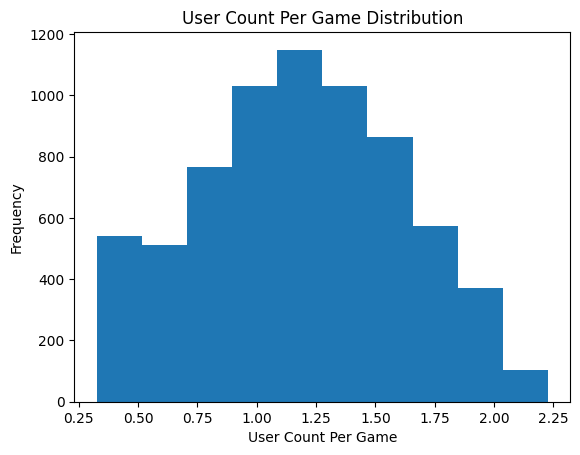

In [216]:
# the data is still somewhat skewed so I applied the log transform again.
df_enc['User_Count'] = np.log(df_enc['User_Count'])
plt.hist(df_enc['User_Count'], bins=10)
plt.xlabel('User Count Per Game')
plt.ylabel('Frequency')
plt.title('User Count Per Game Distribution')
plt.show()

Now we have finished applying log transformations lets place the data into X, and y and split the data into training and test datasets.

In [217]:
X = df_enc.loc[:, df_enc.columns != 'Critic_Score']
y = df_enc['Critic_Score']

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

We should also apply the Standard Scaling to our data as well in order to standardize our data.  

Additional reading for how to prepare data for machine learning can be found here: https://docs.google.com/presentation/d/1E8B3NRdXwm0IVtAryItHqiJSW-WaEFJNm7wMcOMK0nc/edit

In [218]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Section 3.2 Choosing Regression Model and Applying Regression Model.

A Polynomial Regression model is very flexible and can be used to model many different types of relationships. Polynomial Regression is when we try to fit our data according to a polynomial function; however, due to the flexibility of the polynomial function it can easily overfit.

Overfitting occurs when the model fits too closely to the training data, and is isn't able to properly generalize its results to data outside the training data. Resulting in a model that works well for the training data, but does poorly with the test data.

We can try to prevent overfitting by using Elastic Regression, which is a method to "restrain" how quickly our model trains so that it doesn't over fit as much on the training data.

Additional Reading can be found here: https://docs.google.com/presentation/d/1855fEMaH4vrhyK0uWdUmw62gEu3ZtVFTn669QsCBL0Y/edit#slide=id.g2c880e053ff_0_1356

In [219]:
degree = 2
alpha = 0.015

# the model
model = make_pipeline(PolynomialFeatures(degree=degree), ElasticNet(alpha=alpha, max_iter=2000))

In [220]:
# fit the model to the data
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('elasticnet', ElasticNet(alpha=0.015, max_iter=2000))])

In [221]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("MSE on training data: ", mean_squared_error(y_train, y_train_pred))
print("R^2 value on training data: ", r2_score(y_train, y_train_pred))
print("MSE on test data: ", mean_squared_error(y_test, y_test_pred))
print("R^2 value on test data: ", r2_score(y_test, y_test_pred))

MSE on training data:  73.6586329978378
R^2 value on training data:  0.619480055171729
MSE on test data:  80.29957828957427
R^2 value on test data:  0.575212889481248


An $R^2$ value of 0.6 isn't terrible, but the model might be underfitting a bit, where the model isn't complex enough to explain the variability within the data. Lets just test various degrees and see their results to see if a more complex model can capture more of the variability, before starting to overfit!

In [ ]:
alpha = 0.015

for deg in range(1, 6):
  model = make_pipeline(PolynomialFeatures(degree=deg), ElasticNet(alpha=alpha, max_iter=10000))
  model.fit(X_train, y_train)

  y_test_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)

  print("Degree: ", deg, "---------------------------------------------------------------")
  print("MSE on training data (", deg, "): ", mean_squared_error(y_train, y_train_pred))
  print("R^2 value on training data (", deg, "): ", r2_score(y_train, y_train_pred))
  print("MSE on test data (", deg, "): ", mean_squared_error(y_test, y_test_pred))
  print("R^2 value on test data (", deg, "): ", r2_score(y_test, y_test_pred))
  print("--------------------------------------------------------------------------------")


Degree:  1 ---------------------------------------------------------------
MSE on training data ( 1 ):  88.1151492634887
R^2 value on training data ( 1 ):  0.5447978007240262
MSE on test data ( 1 ):  93.65804142686949
R^2 value on test data ( 1 ):  0.5045462299802523
--------------------------------------------------------------------------------
Degree:  2 ---------------------------------------------------------------
MSE on training data ( 2 ):  73.6586329978378
R^2 value on training data ( 2 ):  0.619480055171729
MSE on test data ( 2 ):  80.29957828957427
R^2 value on test data ( 2 ):  0.575212889481248
--------------------------------------------------------------------------------
Degree:  3 ---------------------------------------------------------------
MSE on training data ( 3 ):  63.273163036754255
R^2 value on training data ( 3 ):  0.6731313149870338
MSE on test data ( 3 ):  83.07140379844209
R^2 value on test data ( 3 ):  0.5605498517187322
----------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+02, tolerance: 1.075e+02
  model = cd_fast.enet_coordinate_descent(


Degree:  4 ---------------------------------------------------------------
MSE on training data ( 4 ):  49.64468372923024
R^2 value on training data ( 4 ):  0.7435359367283102
MSE on test data ( 4 ):  111.29041829618592
R^2 value on test data ( 4 ):  0.41127044221852416
--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.938e+04, tolerance: 1.075e+02
  model = cd_fast.enet_coordinate_descent(


Degree:  5 ---------------------------------------------------------------
MSE on training data ( 5 ):  36.184818416065546
R^2 value on training data ( 5 ):  0.8130694998411598
MSE on test data ( 5 ):  245.27109992728822
R^2 value on test data ( 5 ):  -0.29749127020504074
--------------------------------------------------------------------------------


It appears like Degree 2 is optimal. With degree higher than 3, the model begins to overfit resulting in higher results with impressive results on the training data, but poor results in the test data.

Overall, it appears like we can get a decent prediction of critics scores with this model as the MSE was 83. As MSE represented the mean of the error squared. So our squared error is on average 83. Meaning that our actual error should be around 9 or so on average. Meta Critic Scores are out of 100, so we are, on average, off by a letter grade.

The $R^2$ value of 0.6 means that 60% of the variability in the data can be explained by the model. This means that our models results are moderately correlated with the actual results.

We can also apply this model to new data as well.  However, it will have to be standardized and altered in the same way as the training data.

##Section 3.3 Visualization
Lets also Graph Our Model's Results. However, there are many difficulties, especially since the data possesses a lot of dimensions making it very difficult to visualize. We can graph a 2 dimentional snap shot's / slices of the data. Pandas has the ability to plot a scatter matrix, which graphs every variable against each other in 2D plots.

Many of the data however, especially the data from one hot encoding won't be very interesting, and 22 features is way too many features for this. So we will only plot the original numerical data.

The documnetation for the method can be foudn here: https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

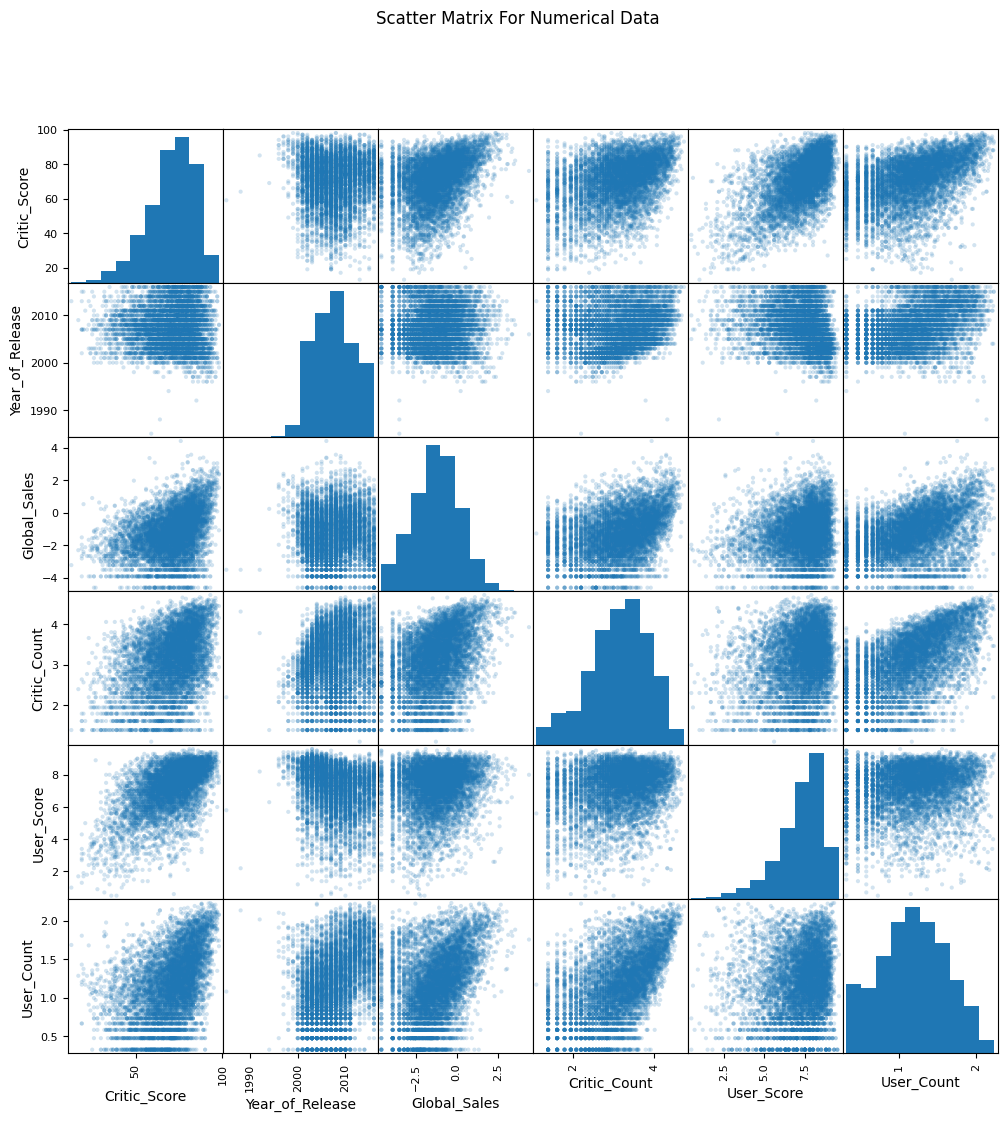

In [223]:
# Scatter matrix on the originally numerical data.
# Recall that this data had not been standerdized yet.
df_vis = df_enc[['Critic_Score', 'Year_of_Release', 'Global_Sales', 'Critic_Count',\
                 'User_Score', 'User_Count']]
pd.plotting.scatter_matrix(df_vis, figsize = (12,12), alpha=0.2);
plt.suptitle('Scatter Matrix For Numerical Data')

plt.show()

In [224]:
degree = 2
alpha = 0.015
# create the model
model = make_pipeline(PolynomialFeatures(degree=degree), ElasticNet(alpha=alpha, max_iter=2000))

# fit the model to the data
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)


I'm not aware of any way to graph the multidimensional polynomial surface of the model, but I can show the locations of the model's predictions vs the actual location of the data.

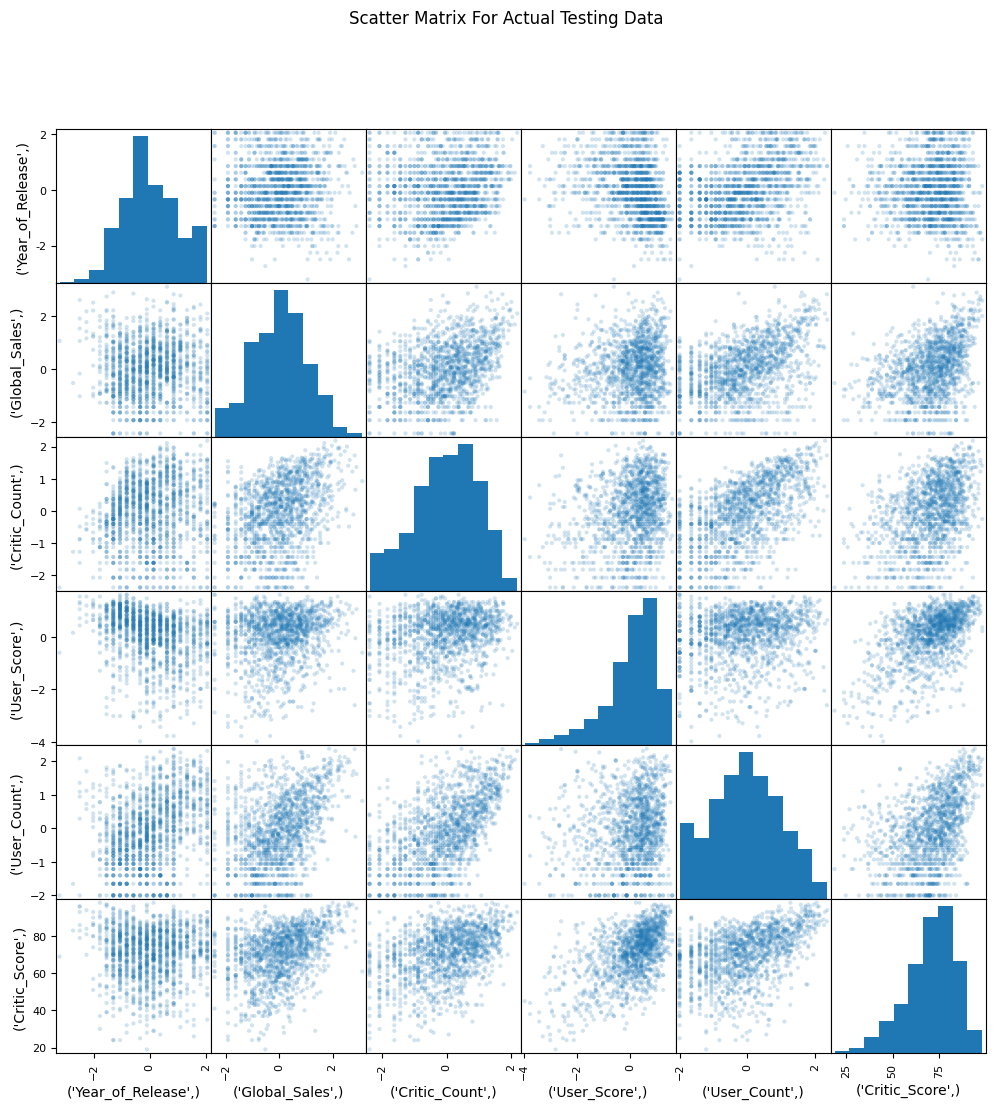

In [225]:
# rejoin data for graphing (while leaving out a the data that was originally not numerical)
y_test_list = y_test.tolist()
X_test_red = [i[0:5] for i in X_test]
df_vis_test_actual = pd.DataFrame(X_test_red, columns=[df_vis.columns[1:]])
df_vis_test_actual['Critic_Score'] = y_test_list

pd.plotting.scatter_matrix(df_vis_test_actual, figsize = (12,12), alpha=0.2);
plt.suptitle('Scatter Matrix For Actual Testing Data')
plt.show()

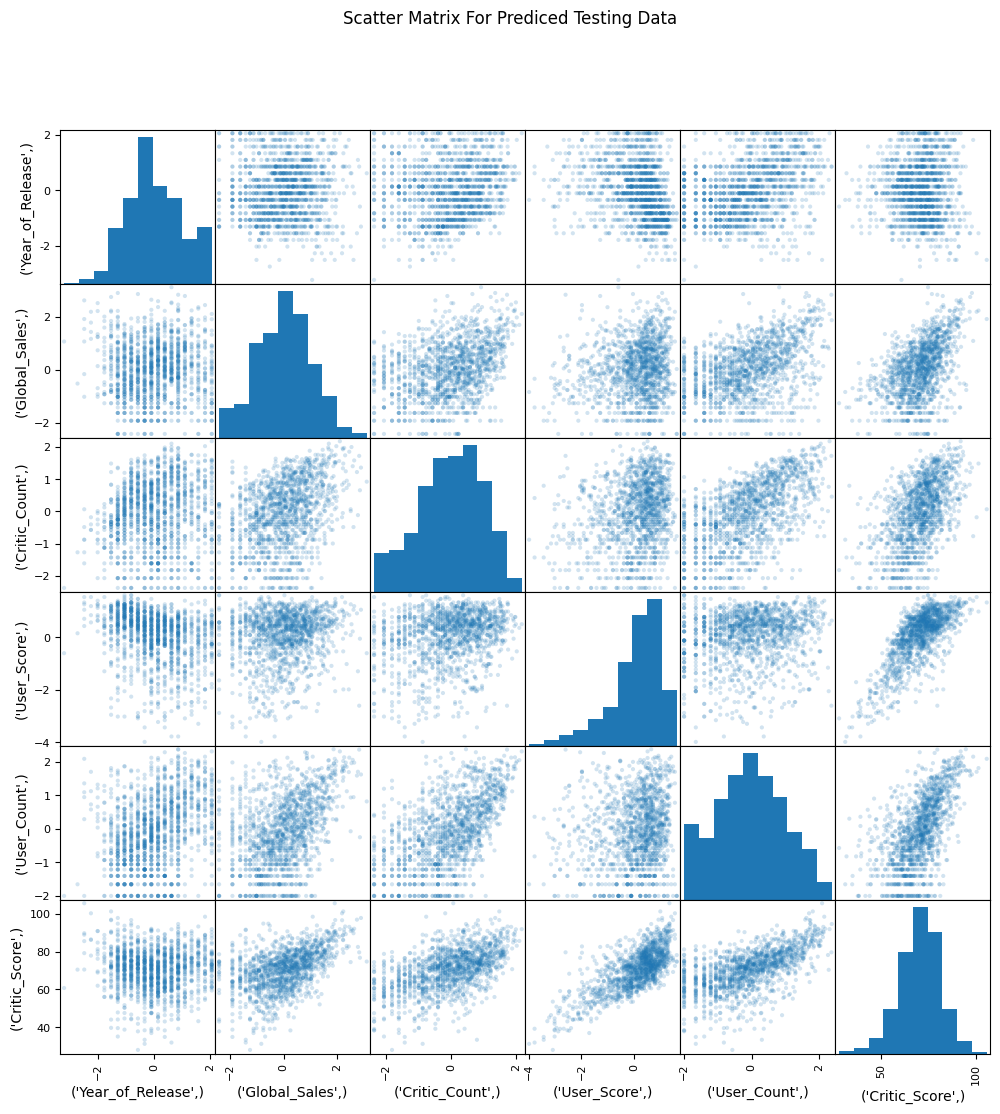

In [226]:
# rejoin data for graphing (while leaving out a the data that was originally not numerical)
y_test_list = y_test_pred.tolist()
X_test_red = [i[0:5] for i in X_test]
df_vis_test_pred = pd.DataFrame(X_test_red, columns=[df_vis.columns[1:]])
df_vis_test_pred['Critic_Score'] = y_test_list

pd.plotting.scatter_matrix(df_vis_test_pred, figsize = (12,12), alpha=0.2);
plt.suptitle('Scatter Matrix For Prediced Testing Data')
plt.show()

Notice that every row was identical except the last row. This makes sense because the only difference between the two datasets is the critics score. In the first dataset (2nd diagram), we have the actual critics score. Meanwhile in the second dataset (3rd diagram) we have the model's predicted score. So you really only need to pay attention to the bottom row of diagrams.

Interestinly enough, despite only getting an $R^2$ value of 0.60, the distribution of the model's predictions for the critics score are actually quite similar to the actual critics scores. However, there does appear to be a significant discrepancy with User Score.

Also you can notice that for the histogram for our model's predicted values for critic score appears to be a normal distribution; however, the actual distribution for Critic Scores is skewed to the left.

# Insights and Conclusion



***Overall:***

Allow me to preface the section with a small warning. Due to the significant portion of data dropped especially the data from metacritic being mroe than half incomplete, it can be difficult to say that any fndings using the data from Metacritic can trully be generalized to video gamming as a whole. Especially since we don't really know entirely why so much of the data was missing, and if the data missing was random or not.

Nonetheless, we managed to successfully create a machine learning regression model that properly fit to the dataset, and had relatively decent results with an $R^2$ value of around 0.6 and a Mean Squared Error of 83, signifying an error on average of about a letter grade. As seen in the graph results, the dsitribution of the data appears to be roughly equivalent for most variables, with the exception of User Score.

In general, our model shows that we can get a decent prediction for a critic's score if we know global sales, release year, critic count, user score, user count, genre, and user rating.


***Looking Forward:***

Additional work could be done with more recent datasets as there have likely been thousands of new games in the 7 year gap since the last time the dataset was updated. Furthermore, Metacritic isn't the only source for game reveiws. There are other game review sources like IGN, Gamespot, Kotaku, etc. It would also be beneficial to find a dataset without such a significant proportion of null values.

Nonetheless, we don't necessarily have to change datasets, as there is still a lot of work that can be done with this dataset. Instead of critics scores, we could try predicting user scores. There are also many potential considerations that could assist in fine tunning the model. For example, throughout the many decades that this dataset covers, significant changes must have occured for critics and video games as a whole. So it might be difficult for the model to properly generalize its predictions across such a large time frame in an industry that changes extremely quickly. For instance, the games released in 1980 (earliest games from the dataset were from 1980) were Pac-Man, Asteroid etc, while games released in 2016 (latest games in the dataset were from 2017) include titles like Overwatch, Titanfall 2, etc. Thus it might be beneficial trying to train the model on only a smaller time frame, and see how that affects accuracy.

We could also conduct additional work into determining which variables had a greater impact in the model through statistical methods as well.
